In [28]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]

In [5]:
def step(corners):
    new = corners.copy()
    new[0] = abs(corners[0] - corners[1])
    new[1] = abs(corners[1] - corners[2])
    new[2] = abs(corners[2] - corners[3])
    new[3] = abs(corners[3] - corners[0])
    return new

In [6]:
def f(corners, verbose=False):
    x = corners
    res = 0
    while x != [0,0,0,0]:
        x = step(x)
        res += 1
        if verbose: print(x)
    return res + 1

In [30]:
def plot_test():
    res = []
    idx = []
    for x in range(100):
        x = [0,7,20,x]
        fx = f(x)
        #print(x, fx)
        res.append(fx)
        idx.append(x)
    return idx, res
idx, res = plot_test()
len(idx), len(res)

(100, 100)

<AxesSubplot: >

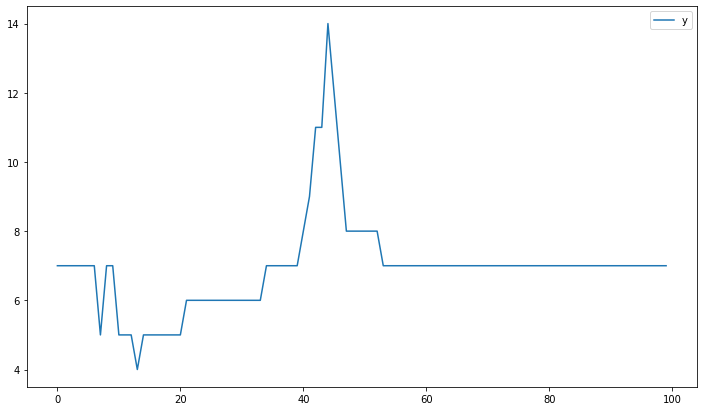

In [31]:
df = pd.DataFrame({'x': idx, 'y': res})
df.plot()

In [50]:
from time import time
t0 = time()

m = ([], 0)
upper = 50
for a in range(upper):
    for b in range(upper):
        for c in range(upper):
            for d in range(upper):
                x = [a,b,c,d]
                fx = f(x)
                if fx > m[1]:
                    m = (x, fx)
                    print(x, '\tfx = ', fx)

print(time() - t0)

[0, 0, 0, 0] 	fx =  1
[0, 0, 0, 1] 	fx =  5
[0, 0, 1, 3] 	fx =  7
[0, 1, 2, 4] 	fx =  8
[0, 1, 4, 9] 	fx =  9
[0, 2, 5, 11] 	fx =  10
[0, 2, 6, 13] 	fx =  11
[0, 5, 14, 31] 	fx =  12
[0, 6, 17, 37] 	fx =  13
[0, 7, 20, 44] 	fx =  14
22.13291311264038


Examples of bigger scores...
[0, 500, 228, 80] 	fx =  16
[0, 1000, 2839, 6222] 	fx =  21

### IMPORTANT (Laws of equality of `f`)!
Regardless of the rotation of the numbers we still get the same value for f!

Example: f(0,2,6,13) = f(2,6,13,0) = f(6,13,0,2) = f(13,0,2,6)

---

Regardless of order (forward or backward) we get the same value for f!

Example: f(0,2,6,13) = f(13,6,2,0)

---

Combining both laws we get
                    normal order                              reverse order
f(0,2,6,13) = f(2,6,13,0) = f(6,13,0,2) = f(13,0,2,6)  =  f(13,6,2,0) = f(6,2,0,13) = ...

In [168]:
tests = [
    [0,2,6,13],
    [2,6,13,0],
    [6,13,0,2],
    [13,0,2,6],
    # flips retain value for `f`
    [13,6,2,0],
    [6,2,0,13],
    [2,0,13,6],
    [0,13,6,2]
]
for t in tests:
    print(f(t))
print('This should drastically reduce the search space, so please have a look :)')
# how to reduce the search space ???

11
11
11
11
11
11
11
11
This should drastically reduce the search space, so please have a look :)


In [7]:
print(
    f([1,2,3,4]) == f([4,3,2,1])
)
print(
    f([1,2,3,4]) == f([1001, 1002, 1003, 1004])
)

True
True


In [8]:
f([0, 123, (2*123)-1, (2*(2*123))+4], verbose=True)

[123, 122, 251, 496]
[1, 129, 245, 373]
[128, 116, 128, 372]
[12, 12, 244, 244]
[0, 232, 0, 232]
[232, 232, 232, 232]
[0, 0, 0, 0]


8

### IMPORTANT: Distances matter, not the values themselves !

In [8]:
print(
    f([1,2,3,4]) == f([4,3,2,1])
)
print(
    f([1,2,3,4]) == f([9999995, 9999996, 9999997, 9999998])
)

True
True


In [121]:
f([0,0,0,1], verbose=True)

[0, 0, 1, 1]
[0, 1, 0, 1]
[1, 1, 1, 1]
[0, 0, 0, 0]


5

In [123]:
f([0,0,1,3], verbose=True)

[0, 1, 2, 3]
[1, 1, 1, 3]
[0, 0, 2, 2]
[0, 2, 0, 2]
[2, 2, 2, 2]
[0, 0, 0, 0]


7

In [28]:
f([0,1,2,4], verbose=True)

[1, 1, 2, 4]
[0, 1, 2, 3]
[1, 1, 1, 3]
[0, 0, 2, 2]
[0, 2, 0, 2]
[2, 2, 2, 2]
[0, 0, 0, 0]


8

In [29]:
f([1,2,4,999], verbose=True)

[1, 2, 995, 998]
[1, 993, 3, 997]
[992, 990, 994, 996]
[2, 4, 2, 4]
[2, 2, 2, 2]
[0, 0, 0, 0]


7

In [9]:
f([0, 7, 20, 44], verbose=True)

[7, 13, 24, 44]
[6, 11, 20, 37]
[5, 9, 17, 31]
[4, 8, 14, 26]
[4, 6, 12, 22]
[2, 6, 10, 18]
[4, 4, 8, 16]
[0, 4, 8, 12]
[4, 4, 4, 12]
[0, 0, 8, 8]
[0, 8, 0, 8]
[8, 8, 8, 8]
[0, 0, 0, 0]


14

In [183]:
f([0, 1000, 2839, 6222], verbose=True)

[1000, 1839, 3383, 6222]
[839, 1544, 2839, 5222]
[705, 1295, 2383, 4383]
[590, 1088, 2000, 3678]
[498, 912, 1678, 3088]
[414, 766, 1410, 2590]
[352, 644, 1180, 2176]
[292, 536, 996, 1824]
[244, 460, 828, 1532]
[216, 368, 704, 1288]
[152, 336, 584, 1072]
[184, 248, 488, 920]
[64, 240, 432, 736]
[176, 192, 304, 672]
[16, 112, 368, 496]
[96, 256, 128, 480]
[160, 128, 352, 384]
[32, 224, 32, 224]
[192, 192, 192, 192]
[0, 0, 0, 0]


21

In [52]:
f([0, 7, 20, 44], verbose=True)

[7, 13, 24, 44]
[6, 11, 20, 37]
[5, 9, 17, 31]
[4, 8, 14, 26]
[4, 6, 12, 22]
[2, 6, 10, 18]
[4, 4, 8, 16]
[0, 4, 8, 12]
[4, 4, 4, 12]
[0, 0, 8, 8]
[0, 8, 0, 8]
[8, 8, 8, 8]
[0, 0, 0, 0]


14

### Find patterns of repeatability.

In [54]:
# Repeatable sets of pairs are pairs that all reduce down to (0,0,0,0)
# The distance between max values ALWAYS grows!

In [ ]:
t0 = time()
upper = 1000
m = 0

res = []
a = 0
for b in range(upper):
    for c in range(b, upper):
        for d in range(c, upper):
            x = [a,b,c,d]
            r = (abs(a-b), abs(b-c), abs(c-d), abs(d-a))
            fx = f(x)
            if fx > m:
                m = fx
                res.append(r)
                print('(a,b,c,d) = ', x, '\t\tdistances =', r, '\tfx = ', fx)
print(time() - t0)

(a,b,c,d) =  [0, 0, 0, 0] 		distances = (0, 0, 0, 0) 	fx =  1
(a,b,c,d) =  [0, 0, 0, 1] 		distances = (0, 0, 1, 1) 	fx =  5
(a,b,c,d) =  [0, 0, 1, 3] 		distances = (0, 1, 2, 3) 	fx =  7
(a,b,c,d) =  [0, 1, 2, 4] 		distances = (1, 1, 2, 4) 	fx =  8
(a,b,c,d) =  [0, 1, 4, 9] 		distances = (1, 3, 5, 9) 	fx =  9
(a,b,c,d) =  [0, 2, 5, 11] 		distances = (2, 3, 6, 11) 	fx =  10
(a,b,c,d) =  [0, 2, 6, 13] 		distances = (2, 4, 7, 13) 	fx =  11
(a,b,c,d) =  [0, 5, 14, 31] 		distances = (5, 9, 17, 31) 	fx =  12
(a,b,c,d) =  [0, 6, 17, 37] 		distances = (6, 11, 20, 37) 	fx =  13
(a,b,c,d) =  [0, 7, 20, 44] 		distances = (7, 13, 24, 44) 	fx =  14
(a,b,c,d) =  [0, 17, 48, 105] 		distances = (17, 31, 57, 105) 	fx =  15
(a,b,c,d) =  [0, 20, 57, 125] 		distances = (20, 37, 68, 125) 	fx =  16
(a,b,c,d) =  [0, 24, 68, 149] 		distances = (24, 44, 81, 149) 	fx =  17
(a,b,c,d) =  [0, 57, 162, 355] 		distances = (57, 105, 193, 355) 	fx =  18
(a,b,c,d) =  [0, 68, 193, 423] 		distances = (68, 125, 230, 423) 	

In [ ]:
df = pd.DataFrame(res, columns=['ab', 'bc', 'cd', 'da'])
df.plot() # the diffs between maxes always grows if we start from 0 -> upper

In [ ]:
# TODO: continue from here when you come back to hacking!
# POTENTIAL IDEA -> See if we can find a way to converge quicker to the right tuple
# EXAMPLE : (0, 68, 193, 423)
#           the previous biggest tuple was (0, 57, 162, 355) distances -> (57, 105, 193, 355)
#           so we can start from b -> a + 57,
#                                 c -> b + 105
#                                  d -> c + 193